In [1]:
%matplotlib inline

import pickle
import collections

import os, random
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

dataPath = '../PedestrianData/IntentionData'
pd.__version__

'0.24.2'

#### Loading the demographic and environmental data from pickle:

In [2]:
data = pd.read_pickle('../PedestrianData/ALLDATA.pkl')

#### Removing folder names from file values (some files are in subfolders):

In [3]:
for i in range(len(data)):
    value = data['File'].values[i].split('/')
    data['File'].values[i] = value[len(value) - 1]

### Reading three sample trials

In [19]:
while True:
    file1 = random.choice(os.listdir(dataPath))    
    file2 = random.choice(os.listdir(dataPath))    
    file3 = random.choice(os.listdir(dataPath))    
    if (data.loc[data['File'] == file1]['Wait Time (s)'].empty
        or data.loc[data['File'] == file2]['Wait Time (s)'].empty
       or data.loc[data['File'] == file3]['Wait Time (s)'].empty):
        continue
    else:
        break

crossTime1 = data.loc[data['File'] == file1]['Wait Time (s)']
crossTime2 = data.loc[data['File'] == file2]['Wait Time (s)']
crossTime3 = data.loc[data['File'] == file3]['Wait Time (s)']

width1 = data.loc[data['File'] == file1]['Lane Width']
width2 = data.loc[data['File'] == file2]['Lane Width']
width3 = data.loc[data['File'] == file3]['Lane Width']

if(data.loc[data['File'] == file1]['One way'].item() == 1):
    lane1 = 'One Way'
else:
    lane1 = "Two Way"
    
if(data.loc[data['File'] == file2]['One way'].item() == 1):
    lane2 = 'One Way'
else:
    lane2 = "Two Way"
    
if(data.loc[data['File'] == file2]['One way'].item() == 1):
    lane3 = 'One Way'
else:
    lane3 = "Two Way"

        
df1 = pd.read_csv(dataPath + '/' + file1, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin"           
                       ])
df2 = pd.read_csv(dataPath + '/' + file2, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin"           
                       ])
df3 = pd.read_csv(dataPath + '/' + file3, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin"           
                       ])




### Visualizing gaze directions over time 

12--2018-12-6--17-57-48.txt
76--2018-28-6--17-31-23.txt
54--2018-29-6--15-10-26.txt


Text(0.5, 0.98, '3 Sample Trials and Gaze Directions')

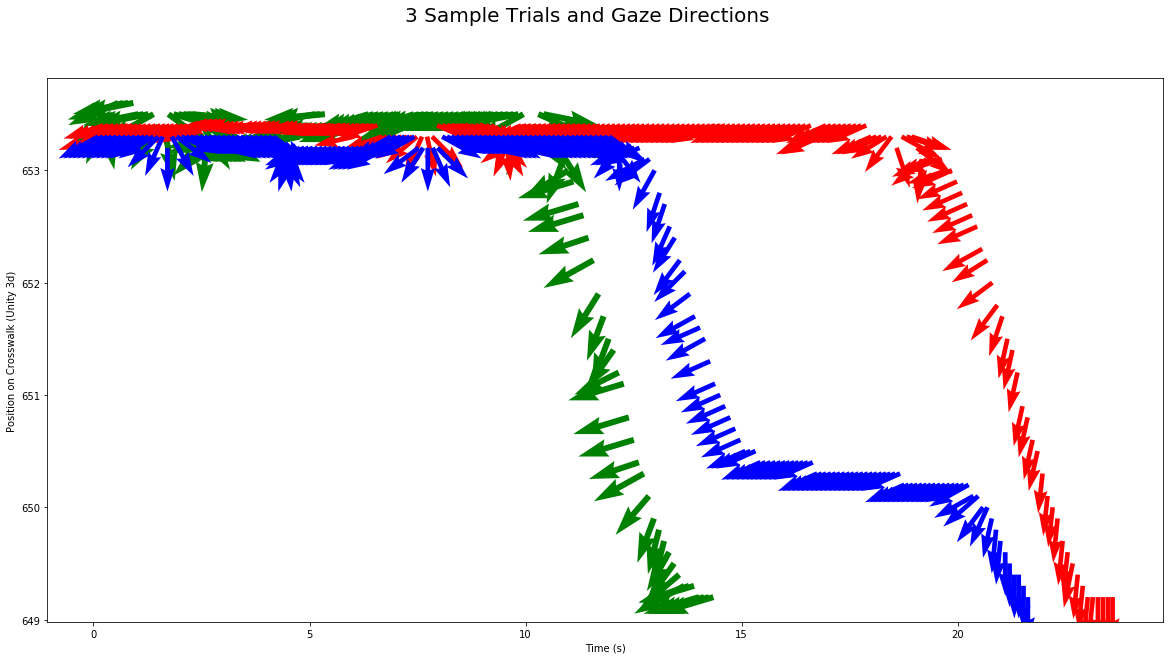

In [20]:
data_x = [crossTime1.tolist()[0], crossTime2.tolist()[0], crossTime3.tolist()[0]]
data_y = [648, 648, 648]
#plt.plot(data_x, data_y, 'or')

print(file1)
print(file2)
print(file3)
plt.figure(figsize=(20,10))
plt.quiver(df1["Time"], df1["Pos_z"], df1["Gaz_x"], df1["Gaz_z"], color='g')
plt.quiver(df2["Time"], df2["Pos_z"], df2["Gaz_x"], df2["Gaz_z"], color='r')
plt.quiver(df3["Time"], df3["Pos_z"], df3["Gaz_x"], df3["Gaz_z"], color='b')

plt.xlabel("Time (s)")
plt.ylabel("Position on Crosswalk (Unity 3d)")
plt.suptitle('3 Sample Trials and Gaze Directions', fontsize=20)

### Histograms of the discretized directions for head gaze
#### Includes lane type and width

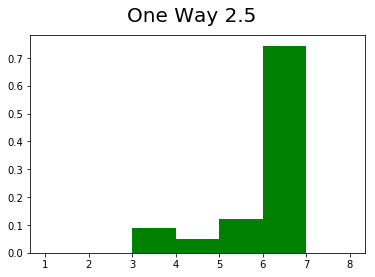

In [45]:
bins2 = df1["Gaz_Bin"]
plt.hist(df1["Gaz_Bin"], bins=[1, 2, 3, 4, 5, 6, 7, 8] , density=True, color = 'g')
plt.suptitle(lane1 + " " + str(width1.values[0]), fontsize=20)
plt.show()

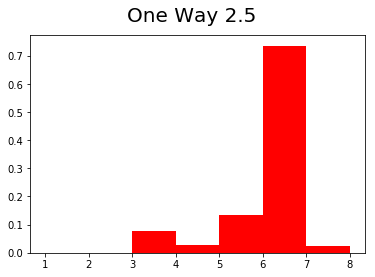

In [43]:
bins2 = df2["Gaz_Bin"]
plt.hist(df2["Gaz_Bin"], bins=[1, 2, 3, 4, 5, 6, 7, 8] , density=True, color = 'r')
plt.suptitle(lane2 + " " + str(width1.values[0]), fontsize=20)
plt.show()

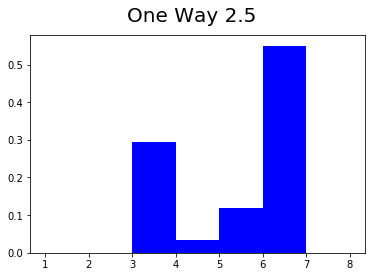

In [44]:
bins2 = df3["Gaz_Bin"]
plt.hist(df3["Gaz_Bin"], bins=[1, 2, 3, 4, 5, 6, 7, 8] , density=True, color = 'b')
plt.suptitle(lane3 + " " + str(width1.values[0]), fontsize=20)
plt.show()

In [28]:
 np.histogram(df3["Gaz_Bin"], bins=[1, 2, 3, 4, 5, 6, 7, 8])

(array([  0,   0,  59,   7,  24, 110,   0], dtype=int64),
 array([1, 2, 3, 4, 5, 6, 7, 8]))